In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,classification_report,roc_curve, auc, f1_score
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 4-Class 

In [4]:
list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP scores/*.txt")

# List to hold individual DataFrames
dfs = []

# Iterate through each file in the directory
for file in list_dir:
    # Read the file into a DataFrame
    #file_path = os.path.join(directory, filename)
    df = pd.read_csv(file) #, delimiter='\t')  # Assuming tab-separated values
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as CSV
merged_df.to_csv("merged_data.csv", index=False)
dataset_after=merged_df

dataset_after = dataset_after.drop(['Unnamed: 0'],axis=1)
dataset_after = dataset_after.drop(['score'],axis=1)
dataset_after

,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,Target,Stimulation
0,0.033752,0.026832,6.146017e-02,0.030909,0.383788,0.344440,1.000000,1.460269e-07,3.546668e-08,0.0,0.0
1,0.033134,0.026059,6.314898e-02,0.036732,0.386172,0.350197,1.000000,1.033784e-08,5.968611e-09,0.0,0.0
2,0.033298,0.026767,6.708787e-02,0.046021,0.386777,0.349459,1.000000,1.959580e-07,9.157318e-08,0.0,0.0
3,0.033493,0.026519,6.282182e-02,0.030459,0.383312,0.341055,1.000000,9.648819e-08,3.575563e-08,0.0,0.0
4,0.032974,0.025866,6.308468e-02,0.033693,0.385092,0.347405,1.000000,4.407161e-08,1.683473e-08,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
806,0.050616,0.026634,2.284669e-02,0.096958,0.315152,0.163408,0.543656,4.563435e-01,5.968653e-08,0.0,0.0
807,0.057557,0.028160,5.235134e-02,0.069468,0.321707,0.192334,0.575948,4.240515e-01,1.911695e-07,0.0,0.0
808,0.053260,0.031083,5.737179e-07,0.108185,0.248023,0.060402,0.445422,5.545780e-01,9.840582e-16,0.0,0.0
809,0.048749,0.026283,3.671914e-07,0.111340,0.312674,0.154662,0.451368,5.486318e-01,3.613233e-09,0.0,0.0


In [5]:
print('Target LRRK2 vs Healthy\n',dataset_after['Target'].value_counts())
print('Stimulated LRRK2 vs Healthy\n',dataset_after['Stimulation'].value_counts())

Target LRRK2 vs Healthy
 0.0    406
1.0    405
Name: Target, dtype: int64
Stimulated LRRK2 vs Healthy
 0.0    514
1.0    297
Name: Stimulation, dtype: int64


In [6]:
dataset=dataset_after
# Combine "target" and "stimulation" columns to create a new categorical variable
#dataset['class'] = dataset['Target'].astype(int) + dataset['Stimulation'].astype(int)
dataset['class'] = np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 0), 0,
                   np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 1), 1,
                   np.where((dataset['Target'] == 1) & (dataset['Stimulation'] == 0), 2, 3)))


# Split the dataset into features (X) and target variable (y)
X = dataset.drop(["Stimulation", "Target", "class"], axis=1)
y = dataset["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


In [7]:
dataset_after['class'].value_counts()

2    282
0    232
1    174
3    123
Name: class, dtype: int64

In [8]:
dataset_after['class'].value_counts(1)

2    0.347719
0    0.286067
1    0.214550
3    0.151665
Name: class, dtype: float64

# Classification Tree

In [83]:
print("Classification report on Test set\n")
gs_ct4 = DecisionTreeClassifier(max_depth=7,random_state=23)
gs_ct4.fit(X_train,y_train)
y_true, y_pred = y_test, gs_ct4.predict(X_test)



Classification report on Test set



In [99]:
accuracy_ct = accuracy_score(y_true, y_pred)
precision_ct = precision_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
recall_ct = recall_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
f1_ct = f1_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
roc_auc_ct=plot_roc_curve_multiclass(y_true, y_pred_proba, 0)
print("Accuracy:", accuracy_ct)
print("Precision:", precision_ct)
print("Recall:", recall_ct)
print("F1-Score:", f1_ct)
print("Micro-average ROC AUC: ",roc_auc_ct)

Accuracy: 0.7361963190184049
Precision: 0.6492424242424242
Recall: 0.6631929806482236
F1-Score: 0.6427701620106742
Micro-average ROC AUC:  0.9034400993639203


In [100]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81        51
           1       0.70      0.88      0.78        26
           2       0.73      0.87      0.80        63
           3       0.30      0.13      0.18        23

    accuracy                           0.74       163
   macro avg       0.65      0.66      0.64       163
weighted avg       0.71      0.74      0.71       163



Text(29.749999999999993, 0.5, 'True')

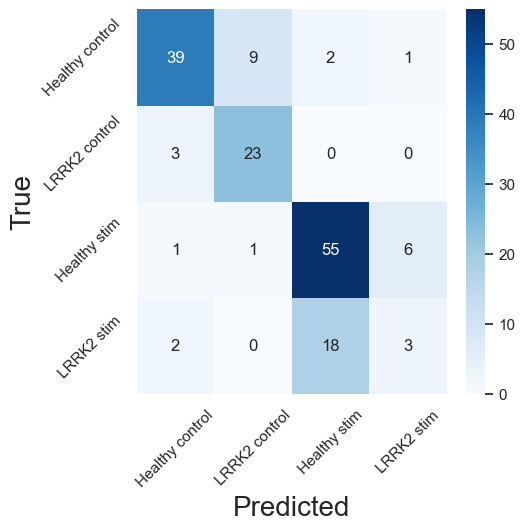

In [101]:
cm=confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (5,5))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted',fontdict={'size':20})
plt.ylabel('True',fontdict={'size':20})

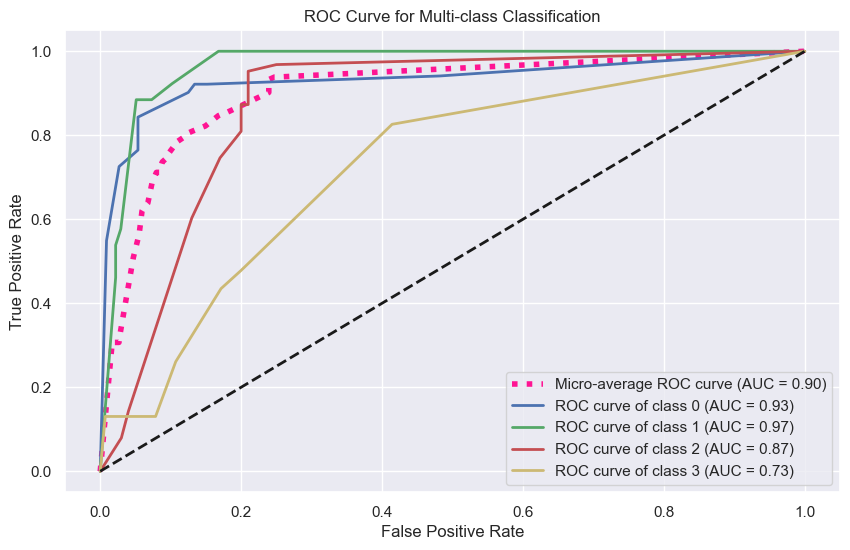

ROC AUC scores:
Class 0: 0.9310224089635853
Class 1: 0.9661706906232453
Class 2: 0.8714285714285714
Class 3: 0.7253105590062111
Micro-average ROC AUC: 0.9034400993639203


0.9034400993639203

In [102]:
y_pred_proba = gs_ct4.predict_proba(X_test)
plot_roc_curve_multiclass(y_true, y_pred_proba, 1)

# Logistic Regression

In [103]:
print("Classification report on Test set\n")
gs_lr4 = LogisticRegression(penalty='l2',C=0.5)#,random_state=12)
gs_lr4.fit(X_train,y_train)
y_true, y_pred = y_test, gs_lr4.predict(X_test)



Classification report on Test set



In [104]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72        51
           1       0.54      0.58      0.56        26
           2       0.73      0.97      0.84        63
           3       0.00      0.00      0.00        23

    accuracy                           0.69       163
   macro avg       0.50      0.57      0.53       163
weighted avg       0.59      0.69      0.64       163



/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(29.749999999999993, 0.5, 'True')

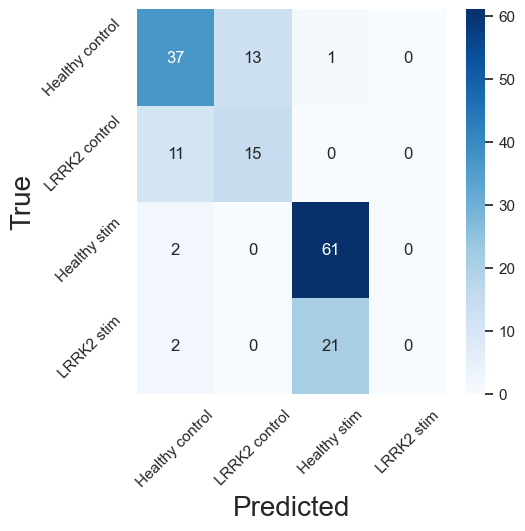

In [105]:
cm=confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (5,5))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted',fontdict={'size':20})
plt.ylabel('True',fontdict={'size':20})

In [106]:
accuracy_lr = accuracy_score(y_true, y_pred)
precision_lr = precision_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
recall_lr = recall_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
f1_lr = f1_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
roc_auc_lr=plot_roc_curve_multiclass(y_true, y_pred_proba, 0)
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)
print("Micro ROC AUC:",roc_auc_lr)

Accuracy: 0.6932515337423313
Precision: 0.49554812657222297
Recall: 0.5676668103138691
F1-Score: 0.5274046489633668
Micro ROC AUC: 0.9034400993639203


/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


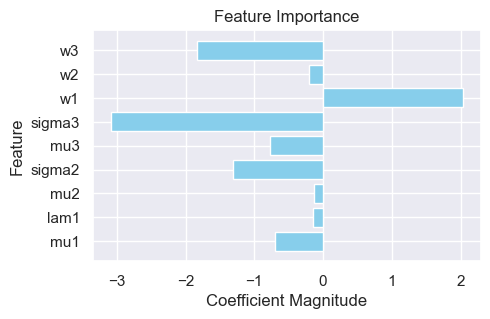

In [107]:
coefficients = gs_lr4.coef_[0]

# Match coefficients with feature names
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(5, 3))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

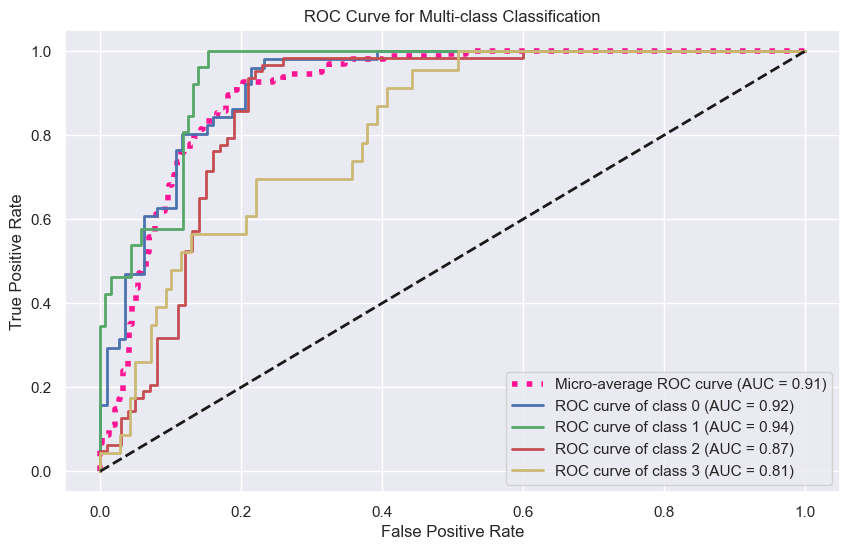

ROC AUC scores:
Class 0: 0.9206932773109244
Class 1: 0.9402021336327906
Class 2: 0.8712698412698412
Class 3: 0.8096273291925467
Micro-average ROC AUC: 0.9083392926593649


0.9083392926593649

In [108]:
y_pred_proba = gs_lr4.predict_proba(X_test)
plot_roc_curve_multiclass(y_true, y_pred_proba, 1)

# Random Forest

In [109]:
from hyperopt.pyll import scope
from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from sklearn.model_selection import cross_val_score
#@scope.define
#def intero(a):
#     return int(a)

In [110]:
from hyperopt import hp

space = {}


#RF
space['n_estimators'] = hp.choice('n_estimators', np.arange(50, 300,1, dtype=int))
space['max_samples'] = hp.uniform('max_samples',0.4,1)
space['max_features'] = hp.uniform('max_features',0.4,1)
space['criterion'] = hp.choice('criterion',['gini','entropy'])
space['max_depth'] = scope.int(hp.quniform('max_depth',3,10,1))
space['ccp_alpha']=hp.uniform('ccp_alpha',0,0.001)
#space['bootstrap']=hp.choice('bootstrap',[False,True])
space['bootstrap'] = hp.choice('bootstrap', [True])
space['min_samples_leaf']=scope.int(hp.quniform('min_samples_leaf',1,5,1))
space['min_samples_split']=scope.int(hp.quniform('min_samples_split',2,10,1))

In [111]:
from sklearn.ensemble import RandomForestClassifier

def objective(params):
        ######################## hyper params ##############################

        params_RF = {}
        
        params_RF['n_estimators'] = params['n_estimators']
        params_RF['max_samples'] = params['max_samples']
        params_RF['max_features'] = params['max_features']
        params_RF['criterion'] = params['criterion']
        params_RF['max_depth'] = params['max_depth']
        params_RF['ccp_alpha'] = params['ccp_alpha']
        params_RF['bootstrap'] = params['bootstrap']
        params_RF['min_samples_leaf'] = params['min_samples_leaf']
        params_RF['min_samples_split'] = params['min_samples_split']
        

        ########################## Classifier definition ###################

        classifier = RandomForestClassifier(n_jobs=-1)
        classifier.set_params(**params_RF)

        
        ######################### Model testing ################################

        shuffle = StratifiedKFold(n_splits=4, shuffle=True, random_state=12)
        
        

        score = cross_val_score(classifier, X_train, y_train, cv=shuffle, scoring='accuracy', n_jobs=-1)
        score = np.mean(score)
        
        

        return 1 - score

    ######################## Start optim ####################################



# The Trials object will store details of each iteration
trials = Trials()

    # Run the hyperparameter search using the tpe algorithm
best = fmin(objective,
                space,
                algo=tpe.suggest,
                max_evals=500,
                trials=trials)

100%|███████| 500/500 [09:12<00:00,  1.10s/trial, best loss: 0.2700617283950617]


In [112]:
cat = {}
cat['n_estimators'] = np.arange(50, 150, dtype=int)
cat['bootstrap'] = [False,True]
cat['criterion'] = ['gini','entropy']
best_models = performance_visualizer(trials, 300, choice=True, **cat)

In [113]:
best_dict = best_models.to_dict(orient='records')[-1]

In [114]:
best_dict.pop('performance')

0.7299382716049383

In [115]:
best_dict['min_samples_leaf']=int(best_dict['min_samples_leaf'])
best_dict['min_samples_split']=int(best_dict['min_samples_split'])
best_dict['max_depth']=int(best_dict['max_depth'])
best_dict['bootstrap']=True

In [116]:
print("Classification report on Test set\n")
gs_rf4 = RandomForestClassifier()
gs_rf4.set_params(**best_dict)
gs_rf4.fit(X_train,y_train)
y_true, y_pred = y_test, gs_rf4.predict(X_test)



Classification report on Test set



In [117]:
accuracy_rf = accuracy_score(y_true, y_pred)
precision_rf = precision_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
recall_rf = recall_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
f1_rf = f1_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
roc_auc_rf=plot_roc_curve_multiclass(y_true, y_pred_proba, 0)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("Micro ROC AUC:", roc_auc_rf)

Accuracy: 0.754601226993865
Precision: 0.6695836302834274
Recall: 0.6731854391700939
F1-Score: 0.6583892407327895
Micro ROC AUC: 0.9083392926593649


Text(29.749999999999993, 0.5, 'True Label')

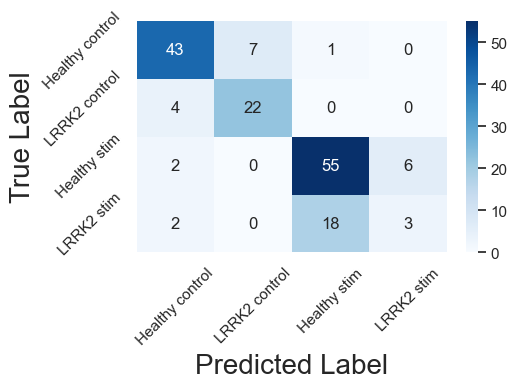

In [118]:
cm=confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (5,3))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap='Blues')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted Label',fontdict={'size':20})
plt.ylabel('True Label',fontdict={'size':20})

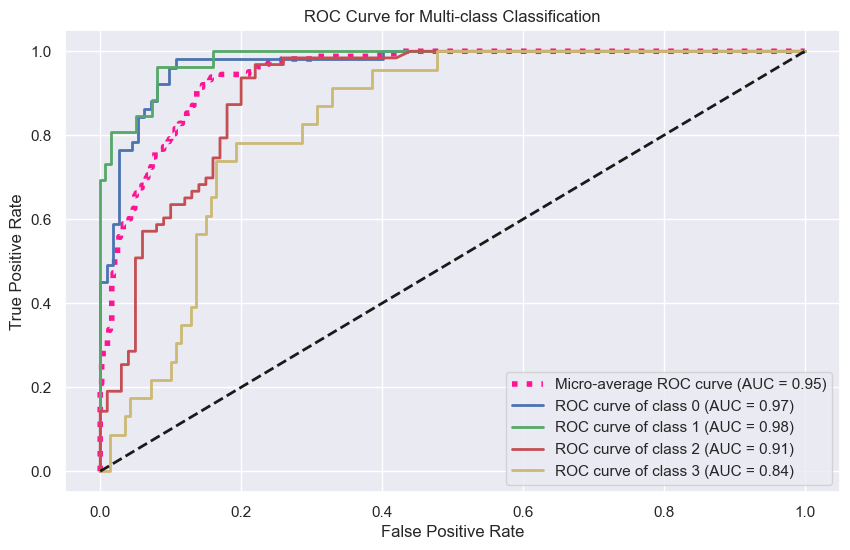

ROC AUC scores:
Class 0: 0.9695378151260504
Class 1: 0.9814710836608647
Class 2: 0.9063492063492063
Class 3: 0.8354037267080745
Micro-average ROC AUC: 0.9459520493808574


0.9459520493808574

In [119]:
y_pred_proba = gs_rf4.predict_proba(X_test)
plot_roc_curve_multiclass(y_true, y_pred_proba, 1)

# SVM

In [120]:
from hyperopt import hp

space = {}



#SVC
space['C']=hp.uniform('C',0.01,100)
space['kernel']=hp.choice('kernel',['rbf'])
space['gamma']=hp.choice('gamma',['scale','auto'])

In [121]:
from sklearn.model_selection import cross_val_score
def objective(params):
        ######################## hyper params ##############################

        params_SVC = {}

        params_SVC['C'] = params['C']
        params_SVC['kernel'] = params['kernel']
        params_SVC['gamma'] = params['gamma']
        

        ########################## Classifier definition ###################

        classifier = SVC(class_weight='balanced',random_state=12)
        classifier.set_params(**params_SVC)

        
        ######################### Model testing ################################

        shuffle = StratifiedKFold(n_splits=4, shuffle=True, random_state=12)
        
        

        score = cross_val_score(classifier, X_train, y_train, cv=shuffle, scoring='accuracy', n_jobs=-1)
        score = np.mean(score)
        
        

        return 1 - score

    ######################## Start optim ####################################



# The Trials object will store details of each iteration
trials = Trials()

    # Run the hyperparameter search using the tpe algorithm
best = fmin(objective,
                space,
                algo=tpe.suggest,
                max_evals=1000,
                trials=trials)

100%|█████| 1000/1000 [01:07<00:00, 14.87trial/s, best loss: 0.3086419753086419]


In [122]:
cat = {}
cat['kernel'] = ['rbf']
cat['gamma'] = ['scale','auto']

        
best_models = performance_visualizer(trials, 100, choice=True, **cat)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

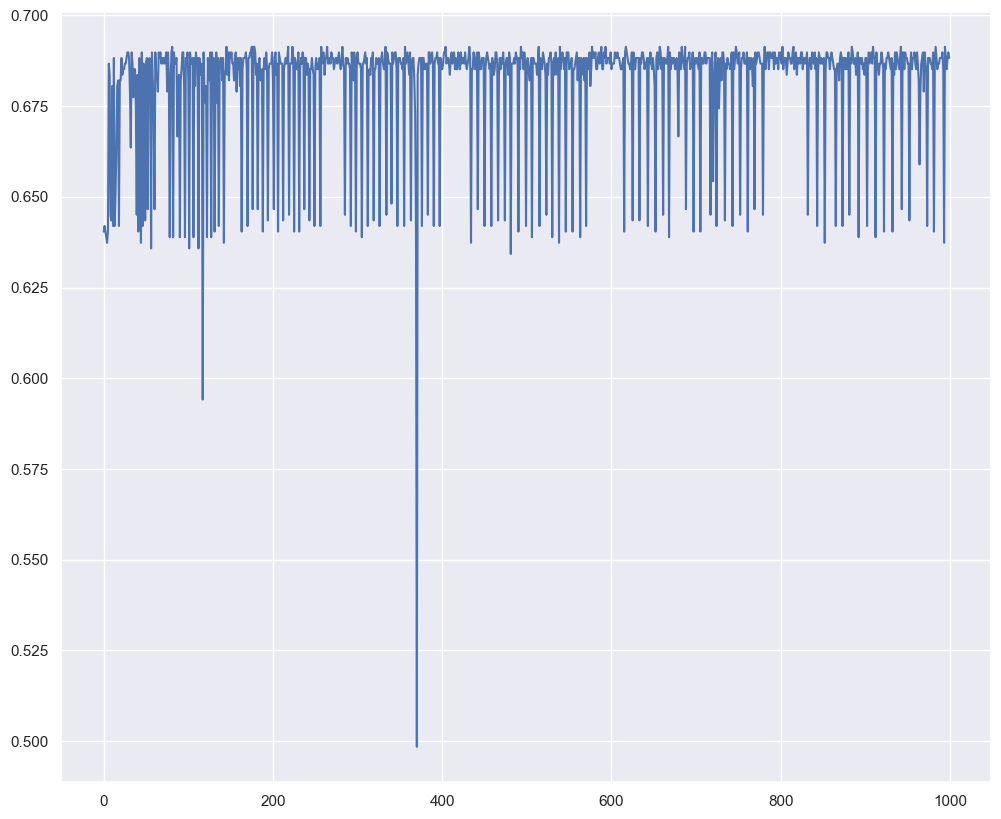

In [123]:
plt.figure(figsize=(12, 10))
sns.lineplot(data=1-pd.Series(data=trials.losses()))
plt.xlabel('iteration');
plt.ylabel('loss');
plt.title('Loss over iterations')
plt.show()

In [124]:
best_dict = best_models.to_dict(orient='records')[-1]

In [125]:
best_dict.pop('performance')

0.6913580246913581

In [126]:
best_dict

{'C': 67.57633349405282, 'gamma': 'scale', 'kernel': 'rbf'}

In [127]:
print("Classification report on Test set\n")
gs_svm4 = SVC(probability=True,random_state=12)
gs_svm4.set_params(**best_dict)
gs_svm4.fit(X_train,y_train)
y_true, y_pred = y_test,gs_svm4.predict(X_test)
print(classification_report(y_true,y_pred))


Classification report on Test set

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        51
           1       0.58      0.96      0.72        26
           2       0.77      0.87      0.82        63
           3       0.50      0.26      0.34        23

    accuracy                           0.72       163
   macro avg       0.68      0.68      0.65       163
weighted avg       0.73      0.72      0.71       163



In [128]:
accuracy_svm = accuracy_score(y_true, y_pred)
precision_svm = precision_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
recall_svm = recall_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
f1_svm = f1_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
roc_auc_svm=plot_roc_curve_multiclass(y_true, y_pred_proba, 0)
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("Micro ROC AUC:", roc_auc_svm)

Accuracy: 0.7239263803680982
Precision: 0.6802270252565045
Recall: 0.6807187200409707
F1-Score: 0.6539157684193375
Micro ROC AUC: 0.9459520493808574


Text(29.749999999999993, 0.5, 'True')

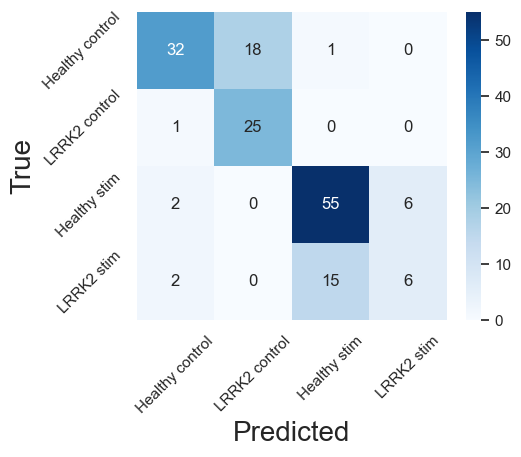

In [129]:
cm=confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (5,4))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap='Blues')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted',fontdict={'size':20})
plt.ylabel('True',fontdict={'size':20})

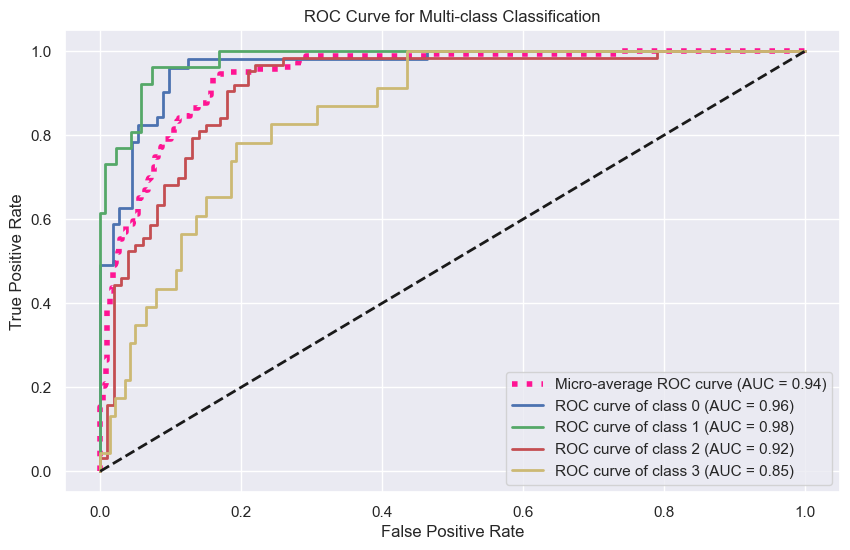

ROC AUC scores:
Class 0: 0.9639355742296918
Class 1: 0.9806288601909039
Class 2: 0.9157142857142857
Class 3: 0.8537267080745341
Micro-average ROC AUC: 0.9404945613308743


0.9404945613308743

In [131]:
y_pred_proba = gs_svm4.predict_proba(X_test)
plot_roc_curve_multiclass(y_true, y_pred_proba, 1)

# Comparisons

In [136]:
print('\nDecision Tree: \n')
print('-->    Accuracy: ',accuracy_ct)
print('Recall: ',recall_ct)
print('-->    Precision: ',precision_ct)
print('F1 score: ',f1_ct)
print('ROC AUC: ',roc_auc_ct)
print('\nAverage Score:',(accuracy_ct + recall_ct + precision_ct + f1_ct + roc_auc_ct) / 5)

print('\n\nLogistic Regression: \n')
print('Accuracy: ',accuracy_lr)
print('Recall: ',recall_lr)
print('Precision: ',precision_lr)
print('F1 score: ',f1_lr)
print('ROC AUC: ',roc_auc_lr)


print('\n\nRandom Forest: \n')
print('-->      Accuracy: ',accuracy_rf)
print('-->        Recall: ',recall_rf)
print('Precision: ',precision_rf)
print('-->      F1 score: ',f1_rf)
print('ROC AUC: ',roc_auc_rf)
print('\nAverage Score:',(accuracy_rf + recall_rf + precision_rf + f1_rf + roc_auc_rf) / 5)

print('\n\nSupport Vector Machine: \n')
print('Accuracy: ',accuracy_svm)
print('-->        Recall: ',recall_svm)
print('-->     Precision: ',precision_svm)
print('-->      F1 score: ',f1_svm)
print('-->       ROC AUC: ',roc_auc_svm)
print('\nAverage Score:',(accuracy_svm + recall_svm + precision_svm + f1_svm + roc_auc_svm) / 5)



Decision Tree: 

-->    Accuracy:  0.7361963190184049
Recall:  0.6631929806482236
-->    Precision:  0.6492424242424242
F1 score:  0.6427701620106742
ROC AUC:  0.9034400993639203

Average Score: 0.7189683970567295


Logistic Regression: 

Accuracy:  0.6932515337423313
Recall:  0.5676668103138691
Precision:  0.49554812657222297
F1 score:  0.5274046489633668
ROC AUC:  0.9034400993639203


Random Forest: 

-->      Accuracy:  0.754601226993865
-->        Recall:  0.6731854391700939
Precision:  0.6695836302834274
-->      F1 score:  0.6583892407327895
ROC AUC:  0.9083392926593649

Average Score: 0.7328197659679081


Support Vector Machine: 

Accuracy:  0.7239263803680982
-->        Recall:  0.6807187200409707
-->     Precision:  0.6802270252565045
-->      F1 score:  0.6539157684193375
-->       ROC AUC:  0.9459520493808574

Average Score: 0.7369479886931536


# Functions

In [26]:
def performance_visualizer(trials_obj,n_models,choice=False,**choice_var):
    
    import pandas as pd
    
    performance = [1-t['result']['loss'] for t in trials_obj.trials]
    
    
    hyperparam= list(trials_obj.trials[0]['misc']['vals'].keys())
    
    values_dict ={}
    
    for i in hyperparam:
        
        values_dict[i]=[]
        
        for j in trials_obj.trials:
            
            if(len(j['misc']['vals'][i])==0):
                
                values_dict[i].append(np.NaN)
                
            else:
            
                values_dict[i].append(j['misc']['vals'][i][0])
                
    out = pd.DataFrame.from_dict(values_dict)
    
    out['performance'] = performance
    
    out=out.sort_values(by=['performance'])
    
    
    if choice:
        
        for i in list(choice_var.keys()):
        
            for j,_ in enumerate(choice_var[i]):
        
                out[i]=out[i].replace(j,choice_var[i][j])
    
    return out.tail(n_models)

In [98]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve_multiclass(y_true, y_prob, visual):
    n_classes=4
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    if visual==1:
        # Plot ROC curve
        plt.figure(figsize=(10, 6))
        plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:0.2f})', color='deeppink', linestyle=':', linewidth=4)

    colors = ['b', 'g', 'r', 'y']  # You can adjust the colors if you have more classes
    if visual==1:
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:0.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)


        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Multi-class Classification')
        plt.legend(loc="lower right")
        plt.show()

        # Print ROC AUC scores
        print("ROC AUC scores:")
        for i in range(n_classes):
            print(f"Class {i}: {roc_auc[i]}")
        print(f"Micro-average ROC AUC: {roc_auc['micro']}")
    auc_return=roc_auc['micro']
    return auc_return
# Example usage:
# plot_roc_curve_multiclass(y_true, y_pred_proba, 4)
